In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from plotters import make_surface_grid, auto_surface
#plot_surface_unit, SYSTEMDATA, SURFACE_XY

In [2]:
base = 'Nicolas/Ei0.6/'
file = 'config_refl.xyz'

In [3]:
!ls $base
!cat $base'statistics.out'

config_admol.xyz
config_refl.xyz
config_stick.xyz
config_sticklate.xyz
statistics.out
traj_admol.out
traj_refl.out
traj_stick.out
traj_stickearly.out
traj_sticklate.out
         nint        nrefl       nstick  nstickearly   nsticklate    nstickpat       nadmol       nprobl
         1000          781           10            0            3            0          206            0


In [24]:
!cat confs

config_admol.xyz
config_refl.xyz
config_stick.xyz
config_sticklate.xyz


In [4]:
!head -n 10 $base$file

          56
           2  0.631199999999979       0.502735394498880      traj,t,v
 Pt     0.0000000000    0.0000000000  -11.1307353845    0.0000000000E+00    0.0000000000E+00    0.0000000000E+00
 Pt     4.0200000000    0.0000000000  -11.1307353845    0.0000000000E+00    0.0000000000E+00    0.0000000000E+00
 Pt     0.0000000000    2.8425700000  -11.1307353845    0.0000000000E+00    0.0000000000E+00    0.0000000000E+00
 Pt     4.0200000000    2.8425700000  -11.1307353845    0.0000000000E+00    0.0000000000E+00    0.0000000000E+00
 Pt     0.0000000000    5.6851400000  -11.1307353845    0.0000000000E+00    0.0000000000E+00    0.0000000000E+00
 Pt     4.0200000000    5.6851400000  -11.1307353845    0.0000000000E+00    0.0000000000E+00    0.0000000000E+00
 Pt     2.0100000000    4.2638500000   -9.7094553845    0.0000000000E+00    0.0000000000E+00    0.0000000000E+00
 Pt     6.0300000000    4.2638500000   -9.7094553845    0.0000000000E+00    0.0000000000E+00    0.0000000000E+00


In [5]:
Nico_Ei06_stick = pd.read_csv(base+file, delim_whitespace=True, header=None, skiprows=2)
Nico_Ei06_stick = Nico_Ei06_stick[[0,1,2,3]]
Nico_Ei06_stick.columns = ['element','x','y','z']
xy = Nico_Ei06_stick.query('element == "C"')

In [31]:
df = {}
trajs = {}
trajs_unit = {}
X_periodic = 8.04
Y_periodic = 8.5277077811

def corregir_valores(df):
    # Desplazamiento rígido para los valores de 'x' que superan 8
    df['x'] = df['x'] % X_periodic

    # Desplazamiento rígido para los valores de 'y' que superan 8.05
    df['y'] = df['y'] % Y_periodic

    return df

for conf in ['config_admol.xyz', 'config_refl.xyz', 'config_stick.xyz', 'config_sticklate.xyz']:
    df[conf] = pd.read_csv(base+conf, delim_whitespace=True, header=None, skiprows=2)
    df[conf] = df[conf][[0,1,2,3]]
    df[conf].columns = ['element','x','y','z']
    trajs[conf] = df[conf].query('element == "C"')
    trajs_unit[conf] = corregir_valores(trajs[conf]) 


C:\Users\guill\AppData\Local\Temp\ipykernel_20312\26508481.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'] = df['x'] % X_periodic
C:\Users\guill\AppData\Local\Temp\ipykernel_20312\26508481.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['y'] % Y_periodic
C:\Users\guill\AppData\Local\Temp\ipykernel_20312\26508481.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [6]:
X_periodic = 8.04
Y_periodic = 8.5277077811

def corregir_valores(df):
    # Desplazamiento rígido para los valores de 'x' que superan 8
    df['x'] = df['x'] % X_periodic

    # Desplazamiento rígido para los valores de 'y' que superan 8.05
    df['y'] = df['y'] % Y_periodic

    return df


In [7]:
xy_fix = corregir_valores(xy)

C:\Users\guill\AppData\Local\Temp\ipykernel_20312\3412310829.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x'] = df['x'] % X_periodic
C:\Users\guill\AppData\Local\Temp\ipykernel_20312\3412310829.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['y'] % Y_periodic


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


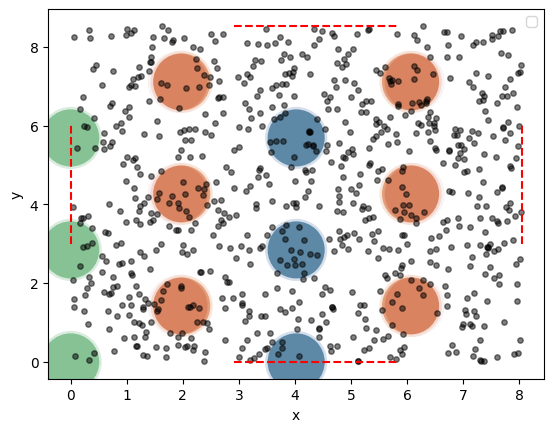

In [10]:
fig, ax = plt.subplots()
ax = auto_surface(ax)
xy_fix.plot(kind='scatter', x='x', y='y', ax=ax, legend='stick',color='black', s=15, alpha = 0.5)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

<Axes: xlabel='x', ylabel='Density'>

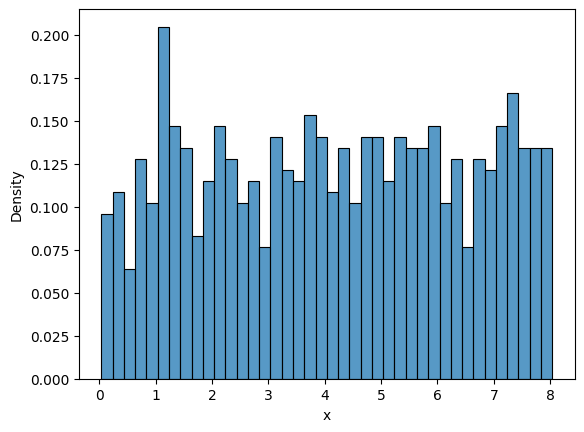

In [16]:
sns.histplot(data=xy_fix, x='x', bins = 40,stat='density')

<Axes: xlabel='y', ylabel='Density'>

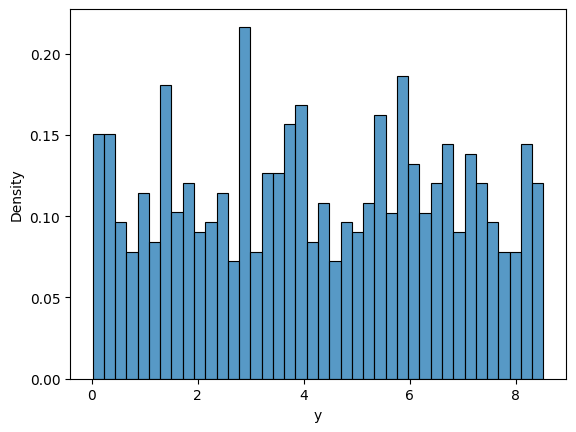

In [17]:
sns.histplot(data=xy_fix, x='y', bins = 40, stat='density')

In [7]:
data = pd.read_csv('gsrd_inputs/systemdata.in', skiprows=17,header=None,delim_whitespace=True)
data.drop(columns=[3,4,5,6], inplace=True)
data.rename({0:'x', 
             1:'y',
             2:'z',
             7:'capa'},
             axis=1, 
             inplace=True)
data.capa = data.capa.fillna(0)
data.capa = data.capa.astype('int')
SYSTEMDATA = data
SURFACE_XY = SYSTEMDATA.query('capa < 5 & capa != 0')

In [80]:
def plot_surface_unit(
        datos, 
        axis1, 
        axis2,
        ax
):
    sns.scatterplot(
        x=datos[axis1], 
        y=datos[axis2], 
        hue=datos['capa'], 
        s=4500, 
        palette=sns.color_palette("deep", n_colors=4), 
        ax = ax,
        alpha=0.7,
        legend=True)
    return ax


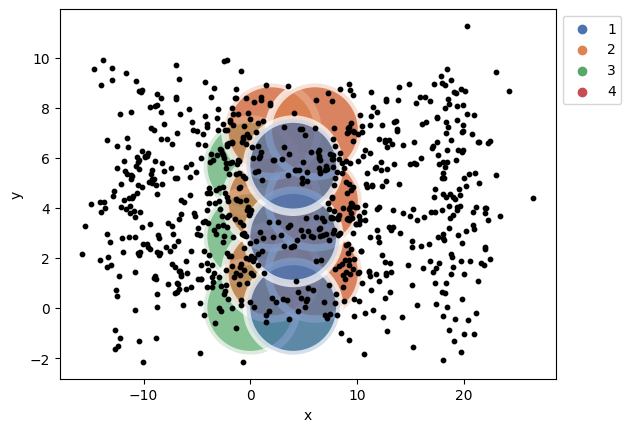

In [81]:
fig, ax = plt.subplots()

ax = plot_surface_unit(SURFACE_XY, 'x','y',ax)

xy.plot(kind='scatter', x='x', y='y', ax=ax, legend='stick',color='black', s=10)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

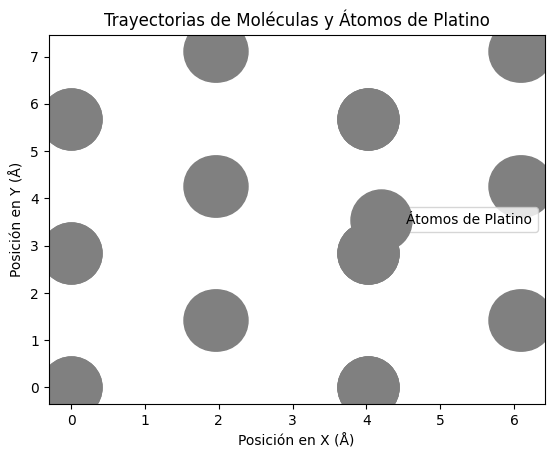

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = xy_fix

# Los datos de las posiciones de los átomos de platino
x_range = [4.01998, 4.01998, 4.01998, 0.00002, 0.00002, 0.00002, 1.93233, 6.10764, 1.93231, 6.10766, 1.93232, 6.10764, 4.01999, 4.01998, 4.01998, 0.00002, 0.00002, 0.00002, 1.98007, 6.05989, 1.98014, 6.05984, 1.98004, 6.05992, 4.01999, 4.01998, 4.01998]
y_range = [2.84255, -0.00001, 5.68514, 5.68519, 2.84252, -0.00003, 7.10641, 7.10641, 4.26384, 4.26385, 1.42128, 1.42128, 2.84254, -0.00002, 5.68516, 5.68517, 2.84253, -0.00002, 1.42127, 1.42127, 4.26384, 4.26385, 7.10642, 7.10642, -0.00001, 2.84257, 5.68513]

# Valor hipotético del radio atómico de platino (escala)
radius = 1.39

# Crear la figura y el eje
fig, ax = plt.subplots()

# Graficar los átomos de Platino como círculos fijos en el fondo
ax.scatter(x_range, y_range, c='gray', marker='o', s=1000*radius**2, label='Átomos de Platino')

#ax.scatter(df['x'], df['y'], marker='o')

# Añadir leyendas y etiquetas
ax.set_xlabel('Posición en X (Å)')
ax.set_ylabel('Posición en Y (Å)')
ax.set_title('Trayectorias de Moléculas y Átomos de Platino')
ax.legend()

# Mostrar el gráfico
plt.show()
